<h1><strong>Construction of the Lagrange Interpolation term based on the given values.</strong></h1>


<h2><strong>Task condition:</strong></h2> 


По заданным значениям Х и У построить [интерполяцяционный многочлен Лагранжа](https://ru.wikipedia.org/wiki/Интерполяционный_многочлен_Лагранжа) и показать это визуально, построив графики.




<strong>Общий вид формулы:</strong>


$$L(x)=\sum_{i=0}^n y_il_i(x)$$

<h2><strong>Task solution:</strong></h2> 


 <strong>Для начала установим нужные нам библиотеки:</strong> 

In [1]:
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


 <strong>Импортируем библиотеки</strong> 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

 <strong>Описание необходимых библиотек:</strong> 
* <b>numpy</b> - библиотека для работы с многомерными массивами, аналог Matlab на Python.
* <b>matplotlob</b> - библиотека для визуализации данных (создание любых видов графиков).


 <strong>Описание самой функции для построения полинома Лагранжа:</strong> 


In [3]:
def Lagrange(points, x):
    sum = 0
    n = len(points)
    for i in range(n):
        x_i, y_i = points[i]
        # Считаю L
        def L(i):
            L_value = 1
            for j in range(n):
                if i == j:
                    continue
                x_j, y_j = points[j]
                L_value *= (x - x_j) / (x_i - x_j)
            return L_value
        sum += y_i * L(i)
    return sum

<strong>Описание:</strong>

Функция $Lagrange(points, x)$ вычисляет значение интерполяционного многочлена Лагранжа для заданных точек $points$ в точке $x$. Для вычисления значения многочлена Лагранжа происходит следующее:
1. Вычисляется количество точек $n$.
2. Для каждой точки $i$ в диапазоне от 0 до $n$:
    - Получаем координаты точки $(xi, yi)$.
    - Выполняется внутренняя функция $L(i)$, которая вычисляет значение множителя $L(i)$ для данной точки $i$. Множитель $L(i)$ строится на основе произведения всех $(x - xj) / (xi - xj)$, где $j$ проходит все точки, кроме $i$.
    - К полученному множителю $L(i)$ умножается значение $yi$ и суммируется в переменную $sum$.
3. Возвращается значение переменной $sum$, которое является значением интерполяционного многочлена Лагранжа в точке $x$.

<strong>Определяю входные условия (функцию на основе заданных точек)</strong>

In [4]:
my_data = np.array([[1, 1], [3, 9], [6, 36], [10, 100], [12, 144]]) # здесь задаю точки графика

<strong>Строю график заданной функции</strong>

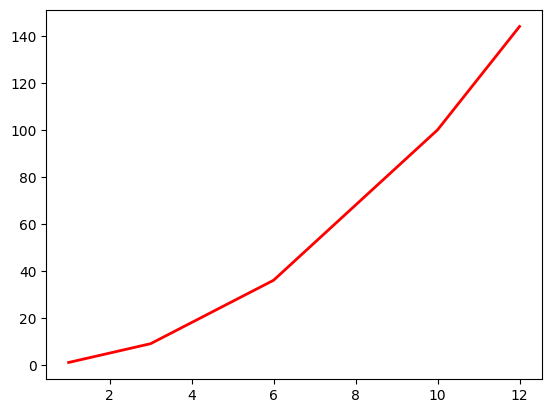

In [5]:
plt.plot(my_data[:,0], my_data[:,1], 'r', linewidth=2)

<strong>Определяю таблицу значений полинома Лагранжа</strong>

In [6]:
z = []
for i in range(13):
    z.append([i, np.round(Lagrange(my_data, i), 10)])

z = np.array(z) 
print(z) 

[[  0.   0.]
 [  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [ 10. 100.]
 [ 11. 121.]
 [ 12. 144.]]


<strong>Cтрою заданную функцию и полином Лагранжа (примерное восстановление функции)</strong>

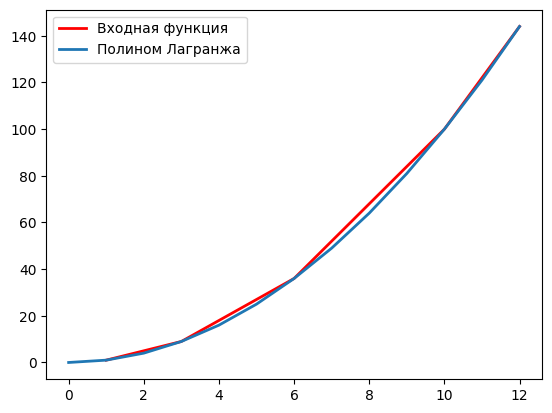

In [7]:
plt.plot(my_data[:,0], my_data[:,1], 'r', z[:,0], z[:,1], linewidth=2)
plt.legend(['Входная функция', 'Полином Лагранжа'])